# Importing Libraries

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
nba_df = pd.read_csv('..\csv\season_10272015_01102023.csv')

# Data Exploration

The process to clean up the data and **understand** the file before diving in. This process includes cleaning up columns, understanding shape, checking for null values, and much more.

In [5]:
nba_df.shape

(129770, 27)

In [6]:
nba_df.columns

Index(['Unnamed: 0', 'Date', 'Name', 'Season', 'TM', 'Opp', 'Score', 'Min',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR',
       'DR', 'Reb', 'Ast', 'TO', 'Stl', 'Blk', 'PF', '+/-', 'Pts'],
      dtype='object')

In [7]:
columns_to_drop = ['Unnamed: 0', 'Min', 'FG%', '3P%', 'FT%', '+/-']
nba_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
nba_df.head(5)

,Date,Name,Season,TM,Opp,Score,FGM,FGA,3PM,3PA,...,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
0,1/10/2023,Jimmy Butler,2022,MIA,OKC,W 111-112,6,17,0,1,...,23,2,5,7,4,2,4,3,1,35
1,1/10/2023,Luka Doncic,2022,DAL,LAC,L 101-113,12,22,3,9,...,21,0,11,11,7,3,2,0,2,43
2,1/10/2023,Damion Lee,2022,PHO,GS,W 125-113,3,8,2,5,...,14,0,7,7,4,2,0,0,1,22
3,1/10/2023,Kawhi Leonard,2022,LAC,DAL,W 101-113,9,12,3,5,...,12,1,8,9,4,2,4,1,0,33
4,1/10/2023,Lauri Markkanen,2022,UTA,CLE,W 114-116,6,18,1,5,...,14,3,13,16,1,1,1,0,2,25


In [9]:
# Verifying that the columns were changed, in this case 6 columns were dropped.

nba_df.shape

(129770, 21)

## Understanding The Data
Searching through the data for any null values and the types of values the data contains.

In [10]:
# Checking if any of the values are Null after dropping the columns

nba_df.isnull().sum()

Date      0
Name      0
Season    0
TM        0
Opp       0
Score     0
FGM       0
FGA       0
3PM       0
3PA       0
FTM       0
FTA       0
OR        0
DR        0
Reb       0
Ast       0
TO        0
Stl       0
Blk       0
PF        0
Pts       0
dtype: int64

In [11]:
nba_df.dtypes

Date      object
Name      object
Season     int64
TM        object
Opp       object
Score     object
FGM        int64
FGA        int64
3PM        int64
3PA        int64
FTM        int64
FTA        int64
OR         int64
DR         int64
Reb        int64
Ast        int64
TO         int64
Stl        int64
Blk        int64
PF         int64
Pts        int64
dtype: object

# Questions
We want to understand which season had a high amount of total point and then understand the data by **players**. 
- Which year had the highest total points?
- Which player had the highest season point per season?

In [12]:
year_totals = nba_df.groupby(['Season'])[['Pts']].sum() 

# The same result would be show by doing ...groupby('Season').sum()

year_totals.reset_index().set_index('Season').sort_values(['Season', 'Pts'], ascending=False) 

# 2021 had the highest points

,Pts
Season,
2022,140481
2021,265754
2020,227588
2019,207598
2018,215839
2017,178577
2016,159819
2015,132695


### Most Total PTS Scored Per Season
We will have to group the data with **two** columns:
- Season
- NBA Player

Then filter the rows that have the highest PTS value per **season**.

In [13]:
most_PTS = nba_df.groupby(['Season', 'Name'])['Pts'].sum()
most_PTS_index = most_PTS.groupby(level=0).idxmax()
pd.DataFrame(most_PTS.loc[most_PTS_index].reset_index().set_index('Season').sort_values('Season', ascending=False))

# https://stackoverflow.com/questions/45521562/python-pandas-return-highest-values-from-multiindex

,Name,Pts
Season,,
2022,Luka Doncic,1301
2021,Trae Young,2168
2020,Stephen Curry,2043
2019,James Harden,2346
2018,James Harden,2830
2017,Lebron James,2280
2016,Russell Westbrook,2599
2015,Stephen Curry,2401


### Most 3 Points Made
Using the same filter to find the most 3's made by a player in a given season.

In [14]:
most_3PM = nba_df.groupby(['Season', 'Name'])['3PM'].sum()
most_3PM_index = most_3PM.groupby(level=0).idxmax()
pd.DataFrame(most_3PM.loc[most_3PM_index].reset_index().set_index('Season'))

# https://stackoverflow.com/questions/45521562/python-pandas-return-highest-values-from-multiindex

,Name,3PM
Season,,
2015,Stephen Curry,408
2016,Stephen Curry,329
2017,James Harden,267
2018,James Harden,382
2019,James Harden,302
2020,Stephen Curry,345
2021,Stephen Curry,301
2022,Buddy Hield,158


In [15]:
most_FTM = nba_df.groupby(['Season', 'Name'])['FTM'].sum()
most_FTM_index = most_FTM.groupby(level=0).idxmax()
pd.DataFrame(most_FTM.loc[most_FTM_index].reset_index().set_index('Season').sort_values('Season', ascending=False))

,Name,FTM
Season,,
2022,Shai Gilgeous-Alexander,343
2021,Joel Embiid,657
2020,Trae Young,484
2019,James Harden,694
2018,James Harden,754
2017,James Harden,624
2016,James Harden,746
2015,James Harden,720


In [16]:
most_FTA = nba_df.groupby(by=['Season', 'Name'])['FTA'].sum()
most_FTA_index = most_FTA.groupby(level=0).idxmax()
pd.DataFrame (most_FTA.loc[most_FTA_index].reset_index().set_index('Season'))

,Name,FTA
Season,,
2015,James Harden,837
2016,James Harden,881
2017,James Harden,727
2018,James Harden,858
2019,James Harden,804
2020,Giannis Antetokounmpo,581
2021,Joel Embiid,806
2022,Giannis Antetokounmpo,449


# Much Simpler Way
It is important to group the DataFrame into the columns you want to group them into. Next, to create a filter to filter through the **.loc** function. However, because there's several columns, you need to specify within the **.loc** function, which column you want to look through. Finally, print your data.

In [17]:
nba_df_grp = nba_df.groupby(by=['Season', 'Name']).sum(numeric_only=True)
nba_df_grp

FGM   FGA  3PM  3PA  FTM  FTA   OR   DR   Reb  Ast  \
Season Name                                                                  
2015   Aaron Gordon     274   579   42  142  129  193  154  353   507  128   
       Al Horford       532  1051   89  257  103  129  148  451   599  265   
       Alec Burks       137   334   32   79  106  141   16   93   109   63   
       Alex Len         264   624    1    7  174  239  178  416   594   97   
       Andre Drummond   560  1071    2    7  208  586  400  811  1211   67   
...                     ...   ...  ...  ...  ...  ...  ...  ...   ...  ...   
2022   Zach Collins     110   198   18   49   47   66   60  111   171   75   
       Zach Lavine      309   662  115  287  134  159   22  141   163  159   
       Zeke Nnaji        51    86    3   19   18   23   30   21    51    7   
       Ziaire Williams   34    82   10   40    9   10    6   39    45   14   
       Zion Williamson  285   469    7   19  177  248   58  144   202  133   

                         TO  Stl  Blk   PF   Pts  
Season Name                                       
2015   Aaron Gordon      66   59   55  153   719  
       Al Horford       107   68  121  163  1256  
       Alec Burks        51   18    4   71   412  
       Alex Len         145   38   62  230   703  
       Andre Drummond   156  121  112  246  1330  
...                     ...  ...  ...  ...   ...  
2022   Zach Collins      61   12   24  103   285  
       Zach Lavine       91   37    6   86   867  
       Zeke Nnaji        15    6    8   53   123  
       Ziaire Williams   19    6    3   27    87  
       Zion Williamson   99   32   16   65   754  

[2622 rows x 15 columns]

In [18]:
data_filter = nba_df_grp.groupby('Season').idxmax()
nba_df_grp.loc[data_filter['Pts']].reset_index(1).sort_values('Pts', ascending=False) # Change what is in the parentheses to check who had the highest number in a given season

,Name,FGM,FGA,3PM,3PA,FTM,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
Season,,,,,,,,,,,,,,,,
2018,James Harden,847,1922,382,1041,754,858,66,456,522,589,390,159,58,245,2830
2016,Russell Westbrook,840,1967,207,596,712,842,139,730,869,847,440,134,31,191,2599
2015,Stephen Curry,815,1616,408,899,363,400,69,366,435,533,264,173,15,162,2401
2019,James Harden,675,1523,302,852,694,804,70,379,449,518,310,126,62,232,2346
2017,Lebron James,869,1597,153,414,389,532,97,622,719,755,352,117,71,137,2280
2021,Trae Young,716,1557,236,619,500,553,50,236,286,747,306,74,7,128,2168
2020,Stephen Curry,668,1384,345,817,362,395,29,320,349,367,214,79,8,119,2043
2022,Luka Doncic,433,865,109,308,326,439,36,302,338,330,140,62,22,110,1301


# Player Analysis
## Doing Analysis on Lebron James
We want to see the changes in numbers for Lebron James in the last 8 years.

In [19]:
player_analysis_df = nba_df_grp
player_analysis_df

# We will be using the already grouped data

FGM   FGA  3PM  3PA  FTM  FTA   OR   DR   Reb  Ast  \
Season Name                                                                  
2015   Aaron Gordon     274   579   42  142  129  193  154  353   507  128   
       Al Horford       532  1051   89  257  103  129  148  451   599  265   
       Alec Burks       137   334   32   79  106  141   16   93   109   63   
       Alex Len         264   624    1    7  174  239  178  416   594   97   
       Andre Drummond   560  1071    2    7  208  586  400  811  1211   67   
...                     ...   ...  ...  ...  ...  ...  ...  ...   ...  ...   
2022   Zach Collins     110   198   18   49   47   66   60  111   171   75   
       Zach Lavine      309   662  115  287  134  159   22  141   163  159   
       Zeke Nnaji        51    86    3   19   18   23   30   21    51    7   
       Ziaire Williams   34    82   10   40    9   10    6   39    45   14   
       Zion Williamson  285   469    7   19  177  248   58  144   202  133   

                         TO  Stl  Blk   PF   Pts  
Season Name                                       
2015   Aaron Gordon      66   59   55  153   719  
       Al Horford       107   68  121  163  1256  
       Alec Burks        51   18    4   71   412  
       Alex Len         145   38   62  230   703  
       Andre Drummond   156  121  112  246  1330  
...                     ...  ...  ...  ...   ...  
2022   Zach Collins      61   12   24  103   285  
       Zach Lavine       91   37    6   86   867  
       Zeke Nnaji        15    6    8   53   123  
       Ziaire Williams   19    6    3   27    87  
       Zion Williamson   99   32   16   65   754  

[2622 rows x 15 columns]

In [20]:
nba_player_analysis = player_analysis_df.reset_index(1)
lebron_james_totals = nba_player_analysis.loc [nba_player_analysis['Name']=='Lebron James']
lebron_james_totals

,Name,FGM,FGA,3PM,3PA,FTM,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
Season,,,,,,,,,,,,,,,,
2015,Lebron James,743,1429,88,287,359,491,111,458,569,521,253,104,49,143,1933
2016,Lebron James,746,1361,127,350,358,531,97,545,642,647,307,92,44,136,1977
2017,Lebron James,869,1597,153,414,389,532,97,622,719,755,352,117,71,137,2280
2018,Lebron James,567,1112,112,335,278,419,59,414,473,458,198,72,35,95,1524
2019,Lebron James,652,1323,150,435,267,385,68,462,530,690,267,79,38,119,1721
2020,Lebron James,424,830,104,288,178,255,29,319,348,354,169,48,26,70,1130
2021,Lebron James,651,1245,163,459,254,336,64,401,465,357,199,76,60,121,1719
2022,Lebron James,353,692,61,207,136,180,36,218,254,209,102,31,17,54,903


In [21]:
steph_curry_totals = nba_player_analysis.loc [nba_player_analysis['Name']=='Stephen Curry']
steph_curry_totals

,Name,FGM,FGA,3PM,3PA,FTM,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
Season,,,,,,,,,,,,,,,,
2015,Stephen Curry,815,1616,408,899,363,400,69,366,435,533,264,173,15,162,2401
2016,Stephen Curry,683,1460,329,801,325,362,63,295,358,530,238,143,17,186,2020
2017,Stephen Curry,432,878,215,512,278,302,38,229,267,315,159,81,8,114,1357
2018,Stephen Curry,638,1363,358,827,264,288,46,332,378,368,194,92,25,166,1898
2019,Stephen Curry,33,82,12,49,26,26,4,22,26,33,16,5,2,11,104
2020,Stephen Curry,668,1384,345,817,362,395,29,320,349,367,214,79,8,119,2043
2021,Stephen Curry,552,1254,301,777,275,298,35,305,340,406,211,86,25,131,1680
2022,Stephen Curry,270,546,136,317,127,139,17,155,172,180,82,28,9,58,803


### Visualize the Change in PTS

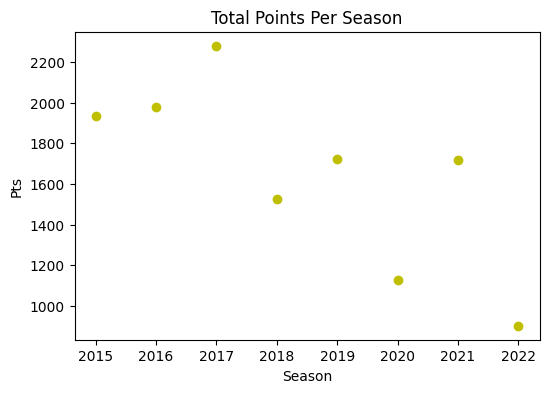

In [22]:
from matplotlib import pyplot as plt

x_lebron = lebron_james_totals['Pts'].reset_index()['Season']
y_lebron = lebron_james_totals['Pts'].reset_index()['Pts']

x_curry = steph_curry_totals['Pts'].reset_index()['Season']
y_curry = steph_curry_totals['Pts'].reset_index()['Pts']

plt.figure(figsize=(6,4))
plt.plot(x_lebron,y_lebron, 'yo')
plt.xlabel('Season')
plt.ylabel('Pts')
plt.title('Total Points Per Season')
plt.show()

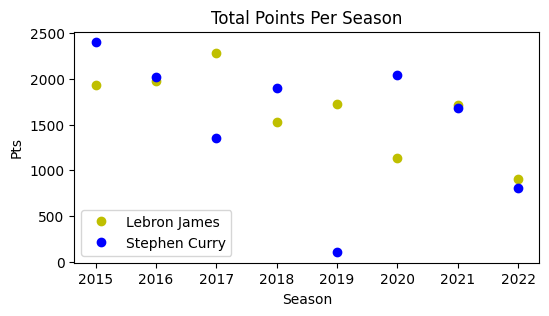

In [23]:
plt.figure(figsize=(6,3))
plt.plot(x_lebron,y_lebron, 'yo', label='Lebron James')
plt.plot(x_curry, y_curry, 'bo', label='Stephen Curry')
plt.xlabel('Season')
plt.ylabel('Pts')
plt.legend()
plt.title('Total Points Per Season', size=12)
plt.show()

## Games Stephen Curry Played in 2019
Stephen Curry injured his hand and did not play for the remainder of the 2019-2020 season. This explains the massive drop of points.

**Link**: https://www.theringer.com/nba/2019/10/31/20941408/steph-curry-broken-hand-golden-state-warriors

In [24]:
nba_df.loc[(nba_df['Name']=='Stephen Curry') & (nba_df['Season']==2019)]

,Date,Name,Season,TM,Opp,Score,FGM,FGA,3PM,3PA,...,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
59957,3/5/2020,Stephen Curry,2019,GS,TOR,L 121-113,6,16,3,12,...,8,0,6,6,7,1,0,0,1,23
74215,10/30/2019,Stephen Curry,2019,GS,PHO,L 121-110,3,11,1,7,...,2,0,5,5,6,4,1,2,2,9
74412,10/28/2019,Stephen Curry,2019,GS,NO,W 134-123,9,17,4,10,...,4,1,2,3,11,1,3,0,5,26
74578,10/27/2019,Stephen Curry,2019,GS,OKC,L 92-120,7,18,2,9,...,7,2,6,8,5,2,0,0,0,23
74993,10/24/2019,Stephen Curry,2019,GS,LAC,L 141-122,8,20,2,11,...,5,1,3,4,4,8,1,0,3,23


In [25]:

mean_stat_df = nba_df.groupby(by=['Season', 'Name']).mean(numeric_only=True).round(2).reset_index(1)
mean_stat_df_steph_curry = mean_stat_df.loc[mean_stat_df['Name']=='Stephen Curry'] 
mean_stat_df_steph_curry

,Name,FGM,FGA,3PM,3PA,FTM,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
Season,,,,,,,,,,,,,,,,
2015,Stephen Curry,10.19,20.20,5.10,11.24,4.54,5.00,0.86,4.58,5.44,6.66,3.30,2.16,0.19,2.02,30.01
2016,Stephen Curry,8.54,18.25,4.11,10.01,4.06,4.53,0.79,3.69,4.47,6.62,2.98,1.79,0.21,2.33,25.25
2017,Stephen Curry,8.31,16.88,4.13,9.85,5.35,5.81,0.73,4.40,5.13,6.06,3.06,1.56,0.15,2.19,26.10
2018,Stephen Curry,9.11,19.47,5.11,11.81,3.77,4.11,0.66,4.74,5.40,5.26,2.77,1.31,0.36,2.37,27.11
2019,Stephen Curry,6.60,16.40,2.40,9.80,5.20,5.20,0.80,4.40,5.20,6.60,3.20,1.00,0.40,2.20,20.80
2020,Stephen Curry,10.44,21.62,5.39,12.77,5.66,6.17,0.45,5.00,5.45,5.73,3.34,1.23,0.12,1.86,31.92
2021,Stephen Curry,8.49,19.29,4.63,11.95,4.23,4.58,0.54,4.69,5.23,6.25,3.25,1.32,0.38,2.02,25.85
2022,Stephen Curry,10.00,20.22,5.04,11.74,4.70,5.15,0.63,5.74,6.37,6.67,3.04,1.04,0.33,2.15,29.74


In [26]:
mean_stat_df = mean_stat_df.reset_index().set_index(['Season', 'Name'])
mean_stat_filter = mean_stat_df.groupby('Season').idxmax()
mean_stat_df.loc[mean_stat_filter['Pts']].reset_index(1).sort_values(by='Pts', ascending=False)

,Name,FGM,FGA,3PM,3PA,FTM,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
Season,,,,,,,,,,,,,,,,
2018,James Harden,10.72,24.33,4.84,13.18,9.54,10.86,0.84,5.77,6.61,7.46,4.94,2.01,0.73,3.10,35.82
2022,Luka Doncic,11.39,22.76,2.87,8.11,8.58,11.55,0.95,7.95,8.89,8.68,3.68,1.63,0.58,2.89,34.24
2019,James Harden,9.78,22.07,4.38,12.35,10.06,11.65,1.01,5.49,6.51,7.51,4.49,1.83,0.90,3.36,34.00
2020,Stephen Curry,10.44,21.62,5.39,12.77,5.66,6.17,0.45,5.00,5.45,5.73,3.34,1.23,0.12,1.86,31.92
2016,Russell Westbrook,10.24,23.99,2.52,7.27,8.68,10.27,1.70,8.90,10.60,10.33,5.37,1.63,0.38,2.33,31.70
2021,Joel Embiid,9.86,19.62,1.42,3.75,9.52,11.68,2.14,9.54,11.68,4.17,3.10,1.12,1.43,2.62,30.65
2017,James Harden,8.99,20.11,3.66,10.07,8.55,9.96,0.58,4.85,5.42,8.74,4.36,1.74,0.70,2.33,30.18
2015,Stephen Curry,10.19,20.20,5.10,11.24,4.54,5.00,0.86,4.58,5.44,6.66,3.30,2.16,0.19,2.02,30.01


<AxesSubplot: >

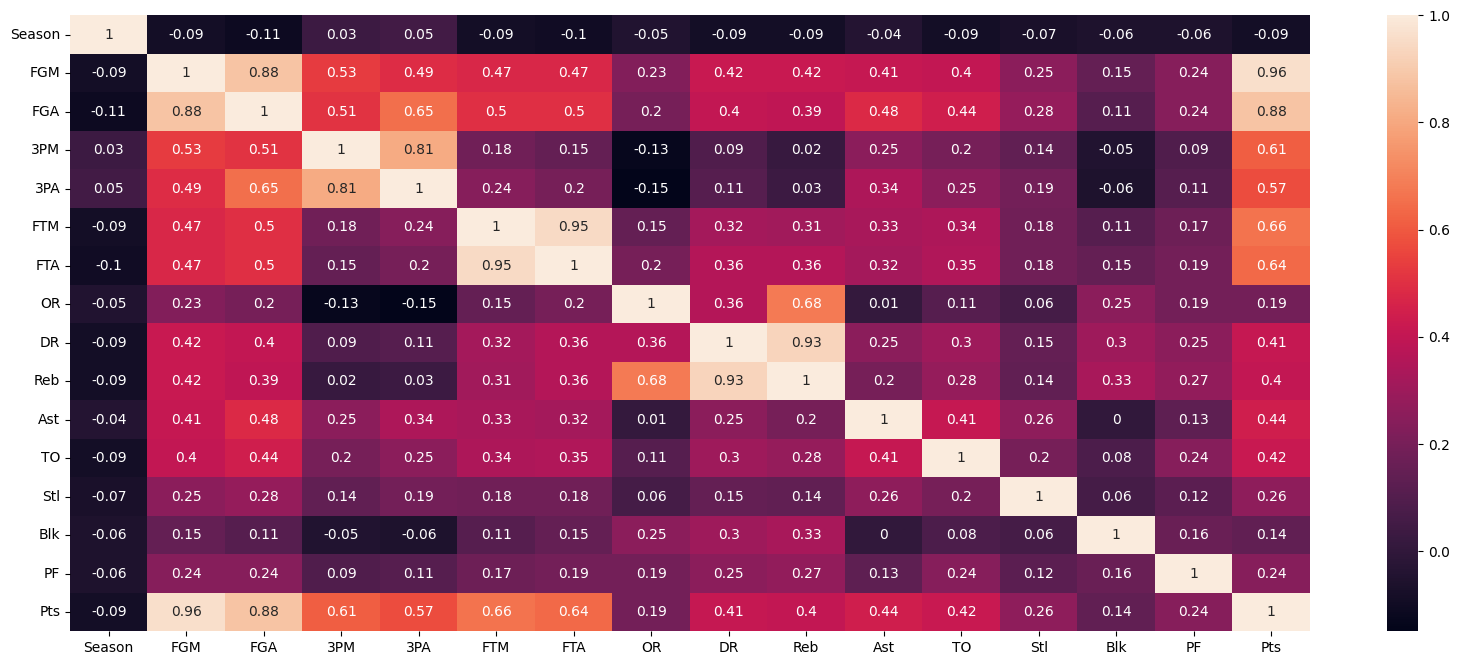

In [36]:
plt.figure(figsize=(20,8))
nba_player_corr = nba_df.corr(numeric_only=True).round(2)
sns.heatmap(nba_player_corr, annot=True)